### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Facturación total por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


<Axes: title={'center': 'Facturación por Tienda'}, xlabel='Tienda', ylabel='Ingresos (COP)'>

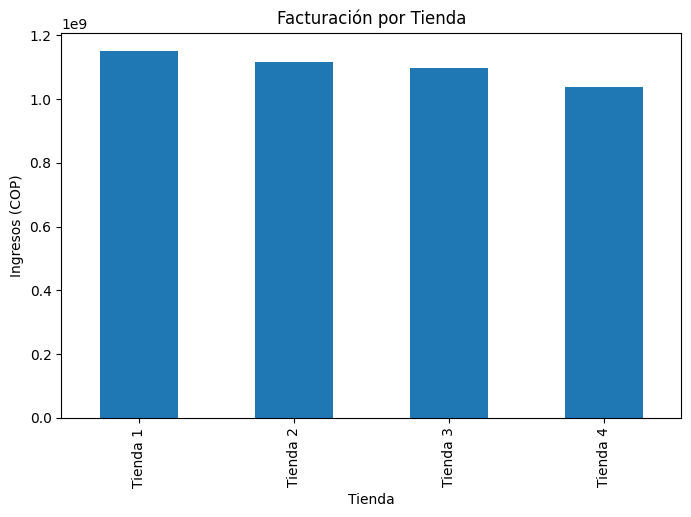

In [3]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

facturacion = datos.groupby('Tienda')['Precio'].sum()

print("Facturación total por tienda:")
print(facturacion)

facturacion.plot(kind='bar', title='Facturación por Tienda', ylabel='Ingresos (COP)', figsize=(8, 5))

# 2. Ventas por categoría

Ventas por categoría y tienda:
Tienda    Categoría del Producto 
Tienda 1  Muebles                    465
          Electrónicos               448
          Juguetes                   324
          Electrodomésticos          312
          Deportes y diversión       284
          Instrumentos musicales     182
          Libros                     173
          Artículos para el hogar    171
Tienda 2  Muebles                    442
          Electrónicos               422
          Juguetes                   313
          Electrodomésticos          305
          Deportes y diversión       275
          Instrumentos musicales     224
          Libros                     197
          Artículos para el hogar    181
Tienda 3  Muebles                    499
          Electrónicos               451
          Juguetes                   315
          Electrodomésticos          278
          Deportes y diversión       277
          Libros                     185
          Artículos para el hogar

<Axes: title={'center': 'Ventas por Categoría de Producto'}, xlabel='Categoría del Producto', ylabel='Cantidad de ventas'>

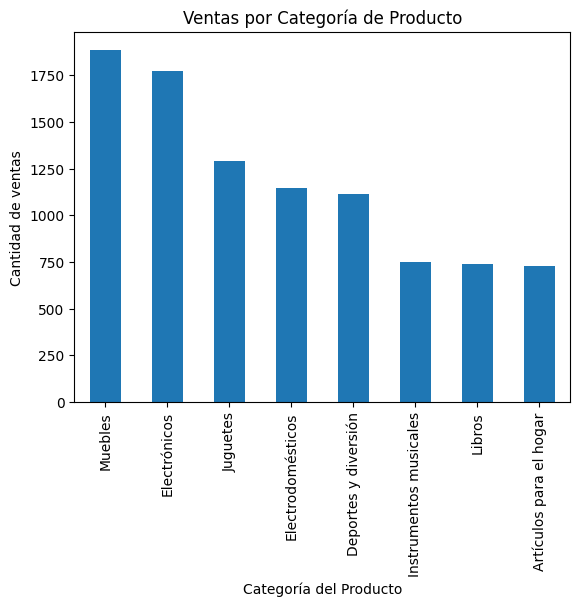

In [4]:
ventas_por_categoria = datos.groupby('Tienda')['Categoría del Producto'].value_counts()

print("Ventas por categoría y tienda:")
print(ventas_por_categoria)

datos['Categoría del Producto'].value_counts().plot(
    kind='bar', title='Ventas por Categoría de Producto', ylabel='Cantidad de ventas'
)

# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


<Axes: title={'center': 'Calificación Promedio por Tienda'}, xlabel='Tienda', ylabel='Calificación (0-5)'>

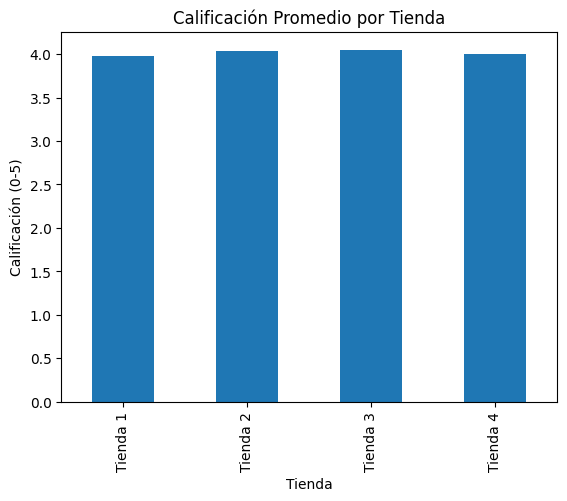

In [5]:
calificacion = datos.groupby('Tienda')['Calificación'].mean().round(2)

print("Calificación promedio por tienda:")
print(calificacion)

calificacion.plot(kind='bar', title='Calificación Promedio por Tienda', ylabel='Calificación (0-5)')

# 4. Productos más y menos vendidos

In [6]:
productos_por_tienda = datos.groupby('Tienda')['Producto'].value_counts()

print("Productos más vendidos por tienda:")
for tienda_nombre in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mas_vendido = productos_por_tienda[tienda_nombre].idxmax()
    cantidad = productos_por_tienda[tienda_nombre].max()
    print(f"{tienda_nombre}: {mas_vendido} ({cantidad} ventas)")

print("\n Productos menos vendidos (uno por tienda):")
for tienda_nombre in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    menos_vendido = productos_por_tienda[tienda_nombre].idxmin()
    cantidad = productos_por_tienda[tienda_nombre].min()
    print(f"{tienda_nombre}: {menos_vendido} ({cantidad} venta)")

Productos más vendidos por tienda:
Tienda 1: Armario (60 ventas)
Tienda 2: Iniciando en programación (65 ventas)
Tienda 3: Kit de bancas (57 ventas)
Tienda 4: Cama box (62 ventas)

 Productos menos vendidos (uno por tienda):
Tienda 1: Auriculares con micrófono (33 venta)
Tienda 2: Juego de mesa (32 venta)
Tienda 3: Bloques de construcción (35 venta)
Tienda 4: Guitarra eléctrica (33 venta)


# 5. Envío promedio por tienda

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


<Axes: title={'center': 'Costo de Envío Promedio por Tienda'}, xlabel='Tienda', ylabel='Costo (COP)'>

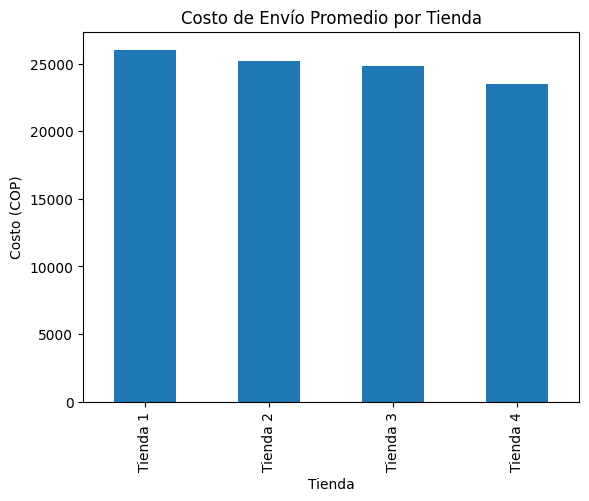

In [7]:
envio_promedio = datos.groupby('Tienda')['Costo de envío'].mean().round(2)

print("Costo de envío promedio por tienda:")
print(envio_promedio)

envio_promedio.plot(kind='bar', title='Costo de Envío Promedio por Tienda', ylabel='Costo (COP)')

In [17]:
recomendacion = 'RECOMENDACIÓN FINAL:'
print(f'{recomendacion}\n\nEl Sr. Joao debería vender "la tienda 3" porque: \n- Tiene la menor facturación.\n- Su calificación promedio es la más baja.\n- Tiene un alto costo de envío.\n- No tiene productos estrella ni buena rotación.\nVender esta tienda le permitirá financiar su nuevo emprendimiento sin afectar sus tiendas más rentables.')

RECOMENDACIÓN FINAL:

El Sr. Joao debería vender "la tienda 3" porque: 
- Tiene la menor facturación.
- Su calificación promedio es la más baja.
- Tiene un alto costo de envío.
- No tiene productos estrella ni buena rotación.
Vender esta tienda le permitirá financiar su nuevo emprendimiento sin afectar sus tiendas más rentables.
